The task of predicting the state of the atmosphere at a future time and a specified location using a statistical model.

## Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/Users/tendulkar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/tendulkar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/tendulkar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/tendulkar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/tendulkar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate bin

In [53]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

In [2]:
df = pd.read_json("datacamp/environ.json")

In [3]:
df.head()

,humidity,precipitation,pressure,radiation,sunshine,temperature,timestamp
0,95.6,0.0,1016.3,0.0,599.2,16.1,2018-09-01 00:00:00
1,NaN,0.1,NaN,NaN,NaN,NaN,2018-09-01 00:05:00
2,95.5,0.0,1016.4,0.0,600.0,16.1,2018-09-01 00:10:00
3,NaN,0.0,NaN,NaN,NaN,NaN,2018-09-01 00:15:00
4,95.2,0.0,1016.5,0.0,598.9,16.1,2018-09-01 00:20:00


In [6]:
df=df.set_index("timestamp")

### Understanding the Data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8631 entries, 2018-10-01 00:05:00 to 2018-10-30 23:55:00
Data columns (total 6 columns):
humidity         4313 non-null float64
precipitation    8627 non-null float64
pressure         4313 non-null float64
radiation        4313 non-null float64
sunshine         4313 non-null float64
temperature      4313 non-null float64
dtypes: float64(6)
memory usage: 472.0 KB


In [22]:
df.describe()

,humidity,precipitation,pressure,radiation,sunshine,temperature
count,4313.000000,8627.000000,4313.000000,4313.000000,4313.000000,4313.000000
mean,71.336865,0.016530,1017.983724,112.612428,149.652748,14.225736
std,19.556365,0.082114,7.396806,187.566174,254.508689,4.526058
min,8.900000,0.000000,989.500000,0.000000,0.000000,1.700000
25%,55.400000,0.000000,1015.000000,0.000000,0.000000,11.100000
50%,76.100000,0.000000,1019.900000,0.000000,0.000000,13.500000
75%,88.300000,0.000000,1023.100000,159.000000,299.300000,17.300000
max,99.100000,1.300000,1028.300000,710.900000,600.000000,26.400000


## Processing IoT data

### 1. Perform EDA

In [10]:
df= df[(df.index>"2018-10-01")&((df.index<"2018-10-31"))]

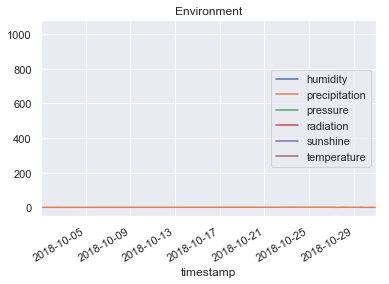

In [13]:
df.plot(title='Environment')

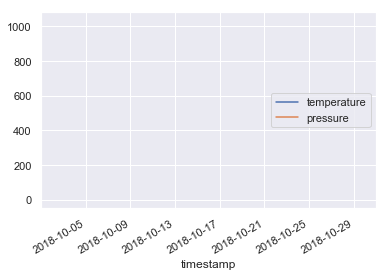

In [18]:
df[["temperature","pressure"]].plot()
plt.xlabel="Time"
plt.show()

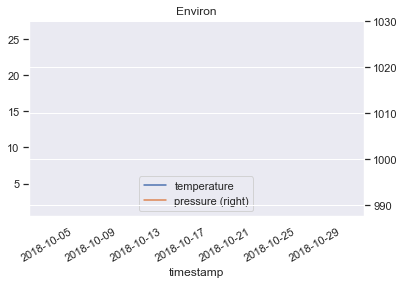

In [19]:
df[["temperature","pressure"]].plot(title="Environ",secondary_y="pressure")
plt.xlabel="Time"
plt.show()

### 2. Line plots

### 3 Histogram Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22d73d30>,
      dtype=object)

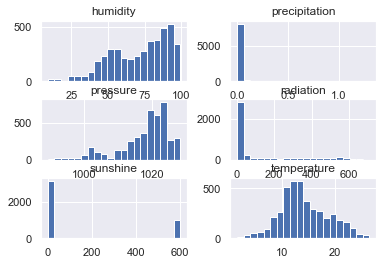

In [20]:
df.hist(bins=20)

### 4 Clean Data
Dealing with missing Data
fill 
1. mean
2. median
3. ffill
4. bfill

drop
1. carefull

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8631 entries, 2018-10-01 00:05:00 to 2018-10-30 23:55:00
Data columns (total 6 columns):
humidity         4313 non-null float64
precipitation    8627 non-null float64
pressure         4313 non-null float64
radiation        4313 non-null float64
sunshine         4313 non-null float64
temperature      4313 non-null float64
dtypes: float64(6)
memory usage: 472.0 KB


In [24]:
df.isna().sum()

humidity         4318
precipitation       4
pressure         4318
radiation        4318
sunshine         4318
temperature      4318
dtype: int64

In [37]:
df1 = df.resample("10min").last().dropna()

In [38]:
df1.isna().sum()

humidity         0
precipitation    0
pressure         0
radiation        0
sunshine         0
temperature      0
dtype: int64

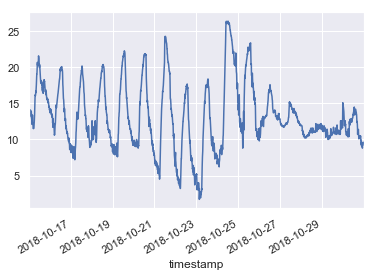

In [39]:
df1[df1.index>"2018-10-15"]["temperature"].plot()

Dealing with missing data


Missing data


Missing data II

### 5 Gather minimalistic incremental data

Which timestamp?


Cache Datastream


Date and Time

### 6 Prepare and visualize incremental data

Pivoting

Reformat data

In [137]:
df1 = df.resample("1h").last().dropna()

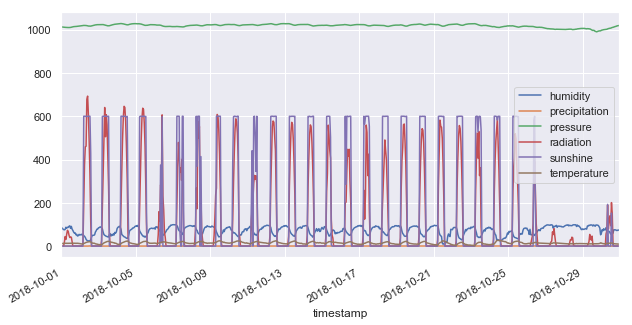

In [138]:
df1.plot()

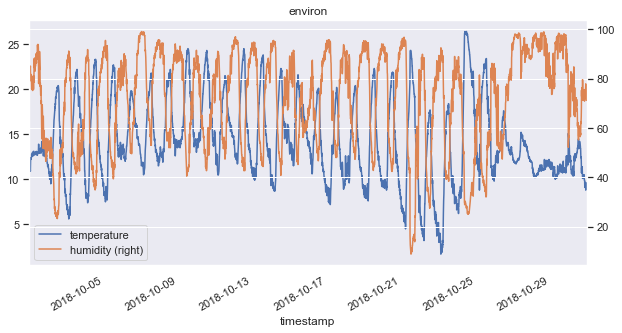

In [54]:
df1[["temperature","humidity"]].plot(title="environ",secondary_y="humidity")
plt.show()

### Data Analysis Difference

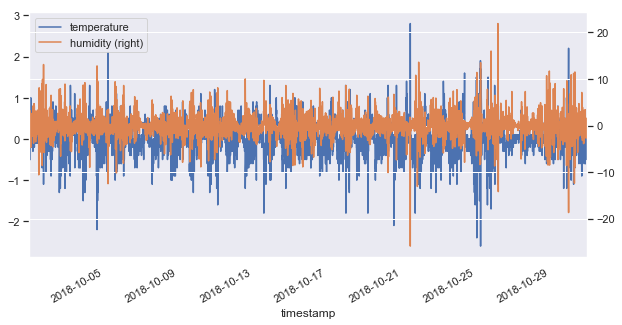

In [56]:
df_diff=df1.diff(1)
df_diff[["temperature","humidity"]].plot(secondary_y="humidity")

In [63]:
df2=df.resample("30min").last().dropna()

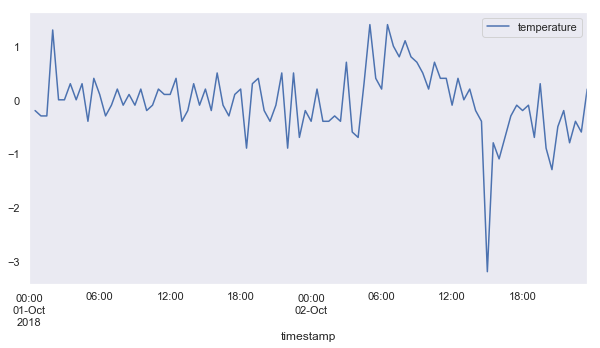

In [67]:
df_diff=df2.diff(1)
low_limit="2018-10-01"
upper_limit = "2018-10-02"
df_diff.loc[low_limit:upper_limit,["temperature"]].plot(secondary_y="humidity")

### Change Percentage

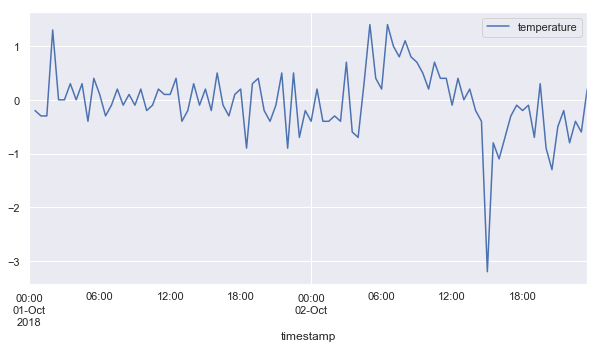

In [71]:
df_pct = df_diff.pct_change()
df_diff.loc[low_limit:upper_limit,["temperature"]].plot()

Analyzing Energy counter data

## Analyzing IoT data

Combining datasources for further analysis


Concatenate dataframes


Combine and resample

### 1 Correlation

In [86]:
corr = df1.corr()
corr

,humidity,precipitation,pressure,radiation,sunshine,temperature
humidity,1.000000,0.209481,-0.111359,-0.604120,-0.606863,-0.748338
precipitation,0.209481,1.000000,-0.447831,-0.100427,-0.105625,-0.111751
pressure,-0.111359,-0.447831,1.000000,0.136143,0.164918,-0.025821
radiation,-0.604120,-0.100427,0.136143,1.000000,0.906463,0.572184
sunshine,-0.606863,-0.105625,0.164918,0.906463,1.000000,0.562907
temperature,-0.748338,-0.111751,-0.025821,0.572184,0.562907,1.000000


###  2 Heatmaps

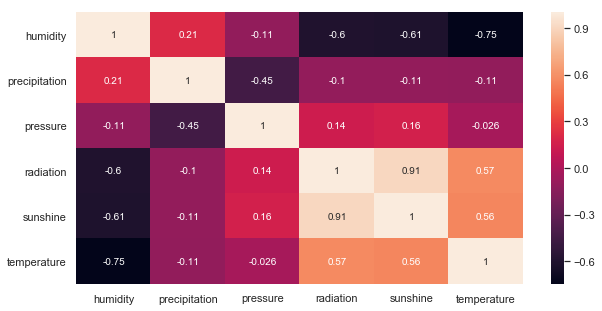

In [88]:
sns.heatmap(corr,annot=True)

### 3 Pairplot

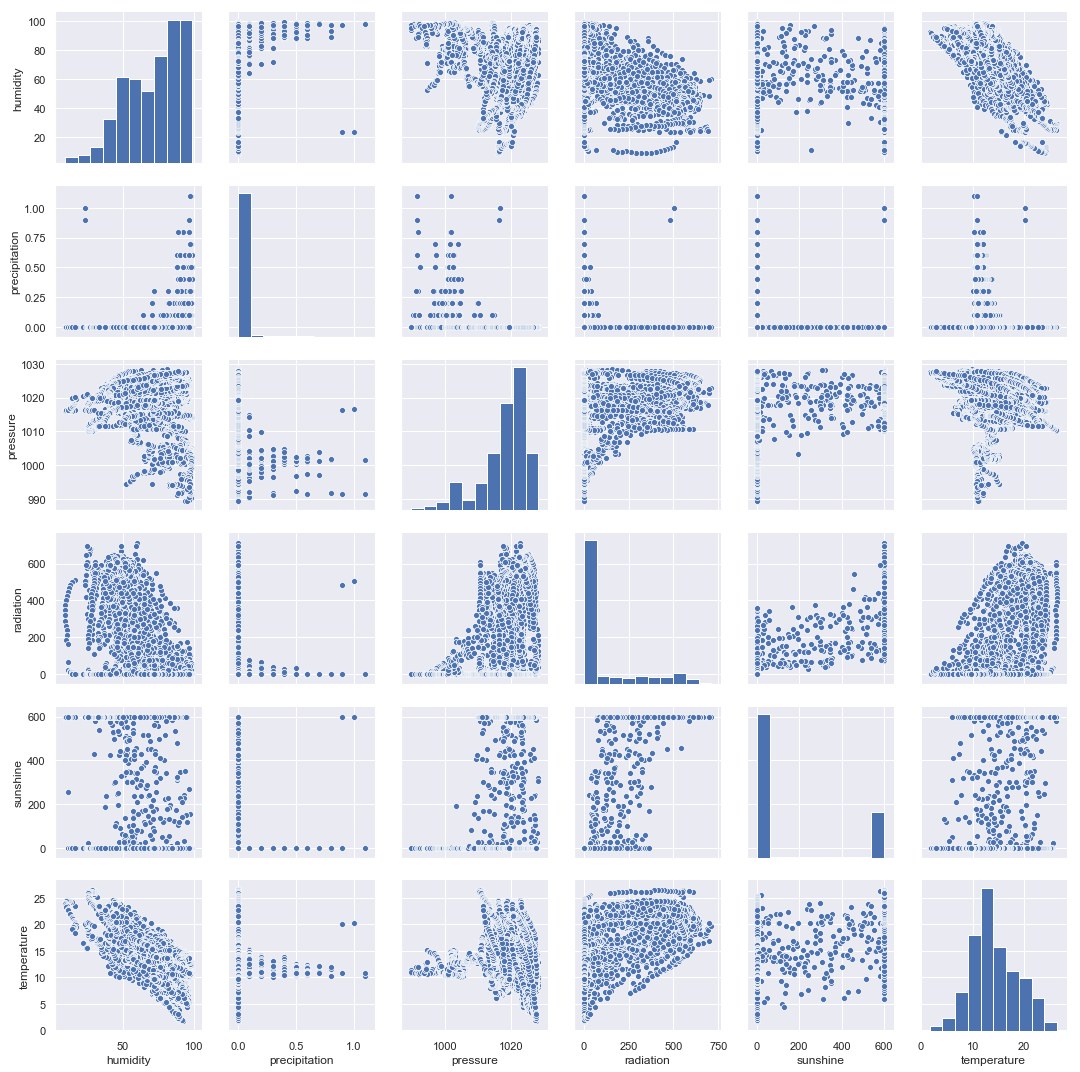

In [90]:
sns.pairplot(df1)

### 4 Outliers
#### Standard deviation

In [128]:
def check_outlier(df):
    for col in df.columns:
        temp = pd.DataFrame()
        temp[col] = df.loc[:,col]
        temp["mean"] = df[col].mean()
        std_dev = df[col].std()
        temp["upper"] = temp["mean"] + (3*std_dev)
        temp["lower"] = temp["mean"] - (3*std_dev)
        temp.plot(title=col)
        plt.show()
        

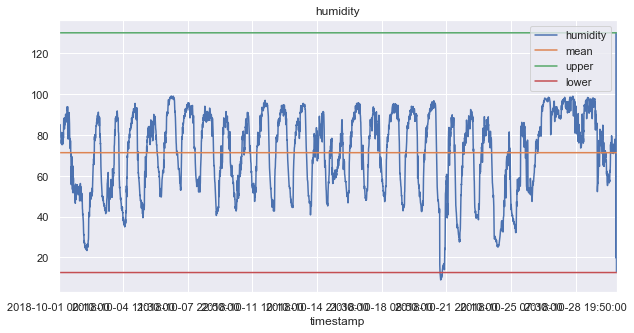

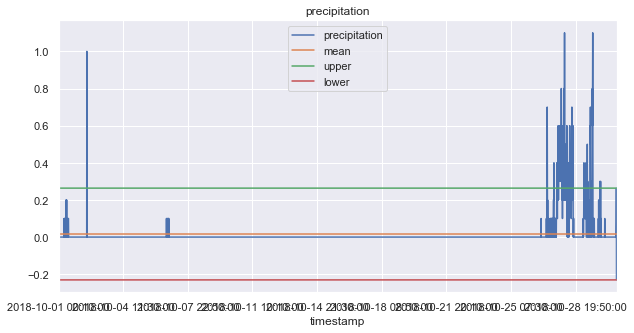

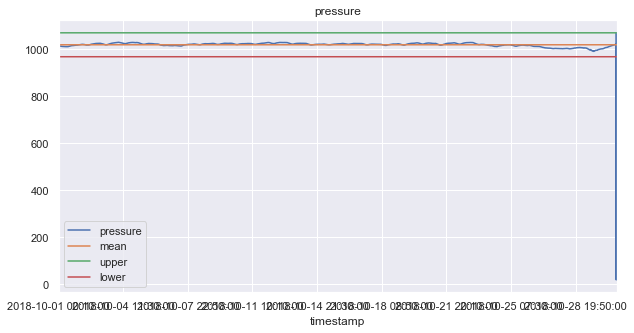

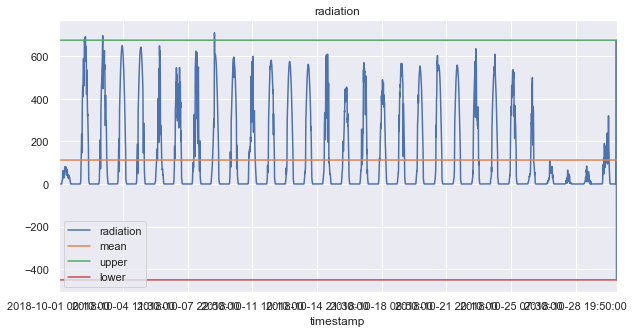

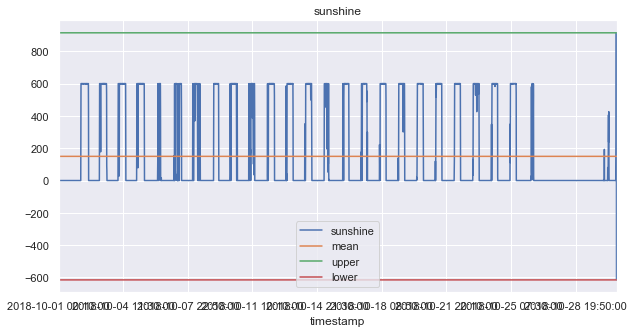

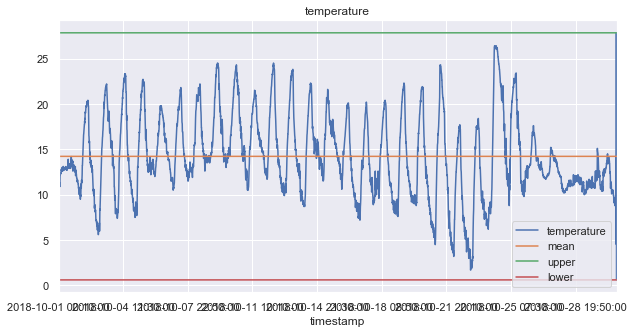

In [129]:
check_outlier(df1)

### 5 Autocorrelation

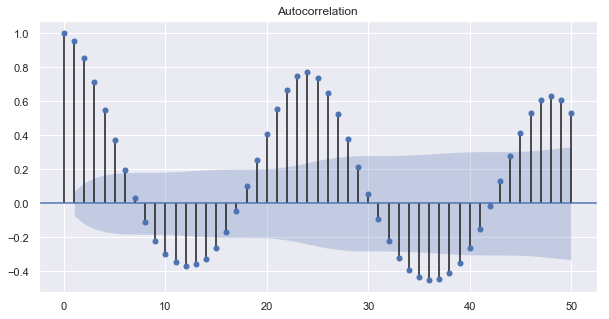

In [139]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(df1["temperature"],lags=50)
plt.show()

### 6 Seasonality and Trends
#### Seasonal decomposition
#### Seasonal decomposition II

In [146]:
import statsmodels.api as sm

In [155]:
df2["temperature"].index.isnull().sum()

0

In [156]:
decom=sm.tsa.seasonal_decompose(df2["temperature"],freq=30)

In [157]:
decom.seasonal.head()

timestamp
2018-10-01 00:00:00   -0.073282
2018-10-01 00:30:00    0.002853
2018-10-01 01:00:00    0.085584
2018-10-01 01:30:00    0.174555
2018-10-01 02:00:00    0.231647
Name: temperature, dtype: float64

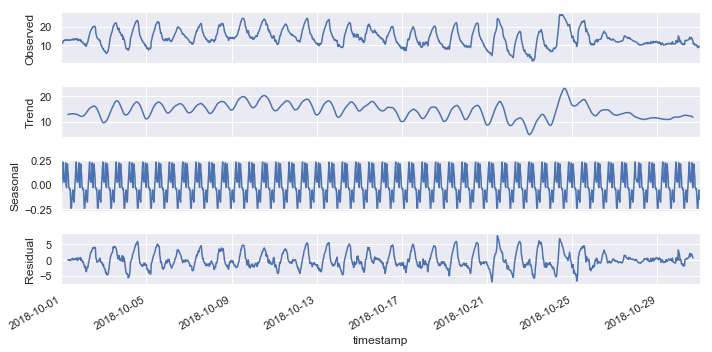

In [159]:
decom.plot()
plt.show()

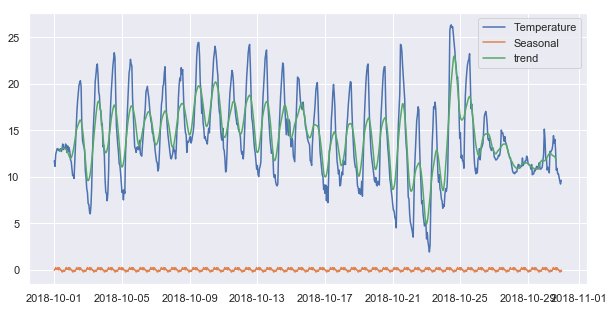

In [164]:
#Combine
plt.plot(df1["temperature"],label="Temperature")
plt.plot(decom.seasonal,label="Seasonal")
plt.plot(decom.trend,label="trend")
plt.legend()
plt.show()

## Machine learning for IoT

### 1 Prepare data for machine learning

In [172]:
df3 = df1[["humidity","temperature","pressure"]]
temp_mean=df3["temperature"].mean()

In [191]:
df3["label"]=df3["temperature"].apply(lambda x:0 if x>=temp_mean else 1 )

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 2. Train/Test split

In [192]:
split_date = "2018-10-13"
train=df3[:split_date]
test = df3[split_date:]

In [194]:
x_train = train.drop("label",axis=1)
y_train = train["label"]

x_test = test.drop("label",axis=1)
y_test = test["label"]

### 3 Logistic Regression

In [195]:
from sklearn.linear_model import LogisticRegression

In [197]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
#logreg.predict(x_test)

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### 4  Scaling data for machine learning
#### Model performance

In [199]:
print(logreg.score(x_test,y_test))
print(logreg.score(x_train,y_train))

0.9907192575406032
1.0


### 5 Scaling

In [200]:
from sklearn.preprocessing import StandardScaler

In [206]:
sc=StandardScaler()
sc.fit(df3.drop("label",axis=1))
print(sc.mean_)
print(sc.var_)

[  71.37454798   14.2147427  1017.9852573 ]
[381.14921311  20.48175762  54.75939322]


In [212]:
df_scaled = sc.transform(df3.drop("label",axis=1))
df_scaled = pd.DataFrame(df_scaled,columns=df3.drop("label",axis=1).columns,index=df3.index)

In [214]:
train=df_scaled[:split_date]
test = df_scaled[split_date:]

x_train = train
y_train = df3[:split_date]["label"]

x_test = test
y_test = df3[split_date:]["label"]

In [216]:
#Evaluate
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
print(logreg.score(x_test,y_test))
print(logreg.score(x_train,y_train))

0.974477958236659
0.9743589743589743


/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 6 Develop machine learning pipeline
#### Creating Pipelines

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [218]:
sc=StandardScaler()
logreg=LogisticRegression()
pl = Pipeline([("scalar",sc),("log",logreg)])
pl

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [219]:
pl.fit(x_train,y_train)
pl.score(x_test,y_test)

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.974477958236659

Store Pipeline

Apply a machine learning model


Model predictions


Apply model to data stream


Wrapping up